In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv',) 

In [3]:

dataset.shape




(10000, 14)

In [4]:
dataset.columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dataset=dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

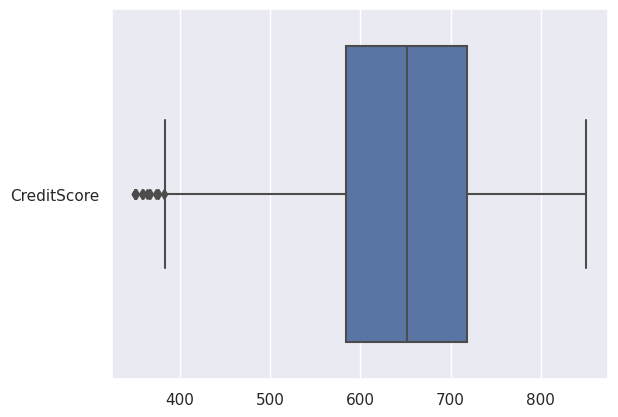

In [9]:
list=['CreditScore']
sns.set(style='darkgrid')
sns.boxplot(data=dataset[list],orient='h')

In [10]:
sns.set(style='ticks')

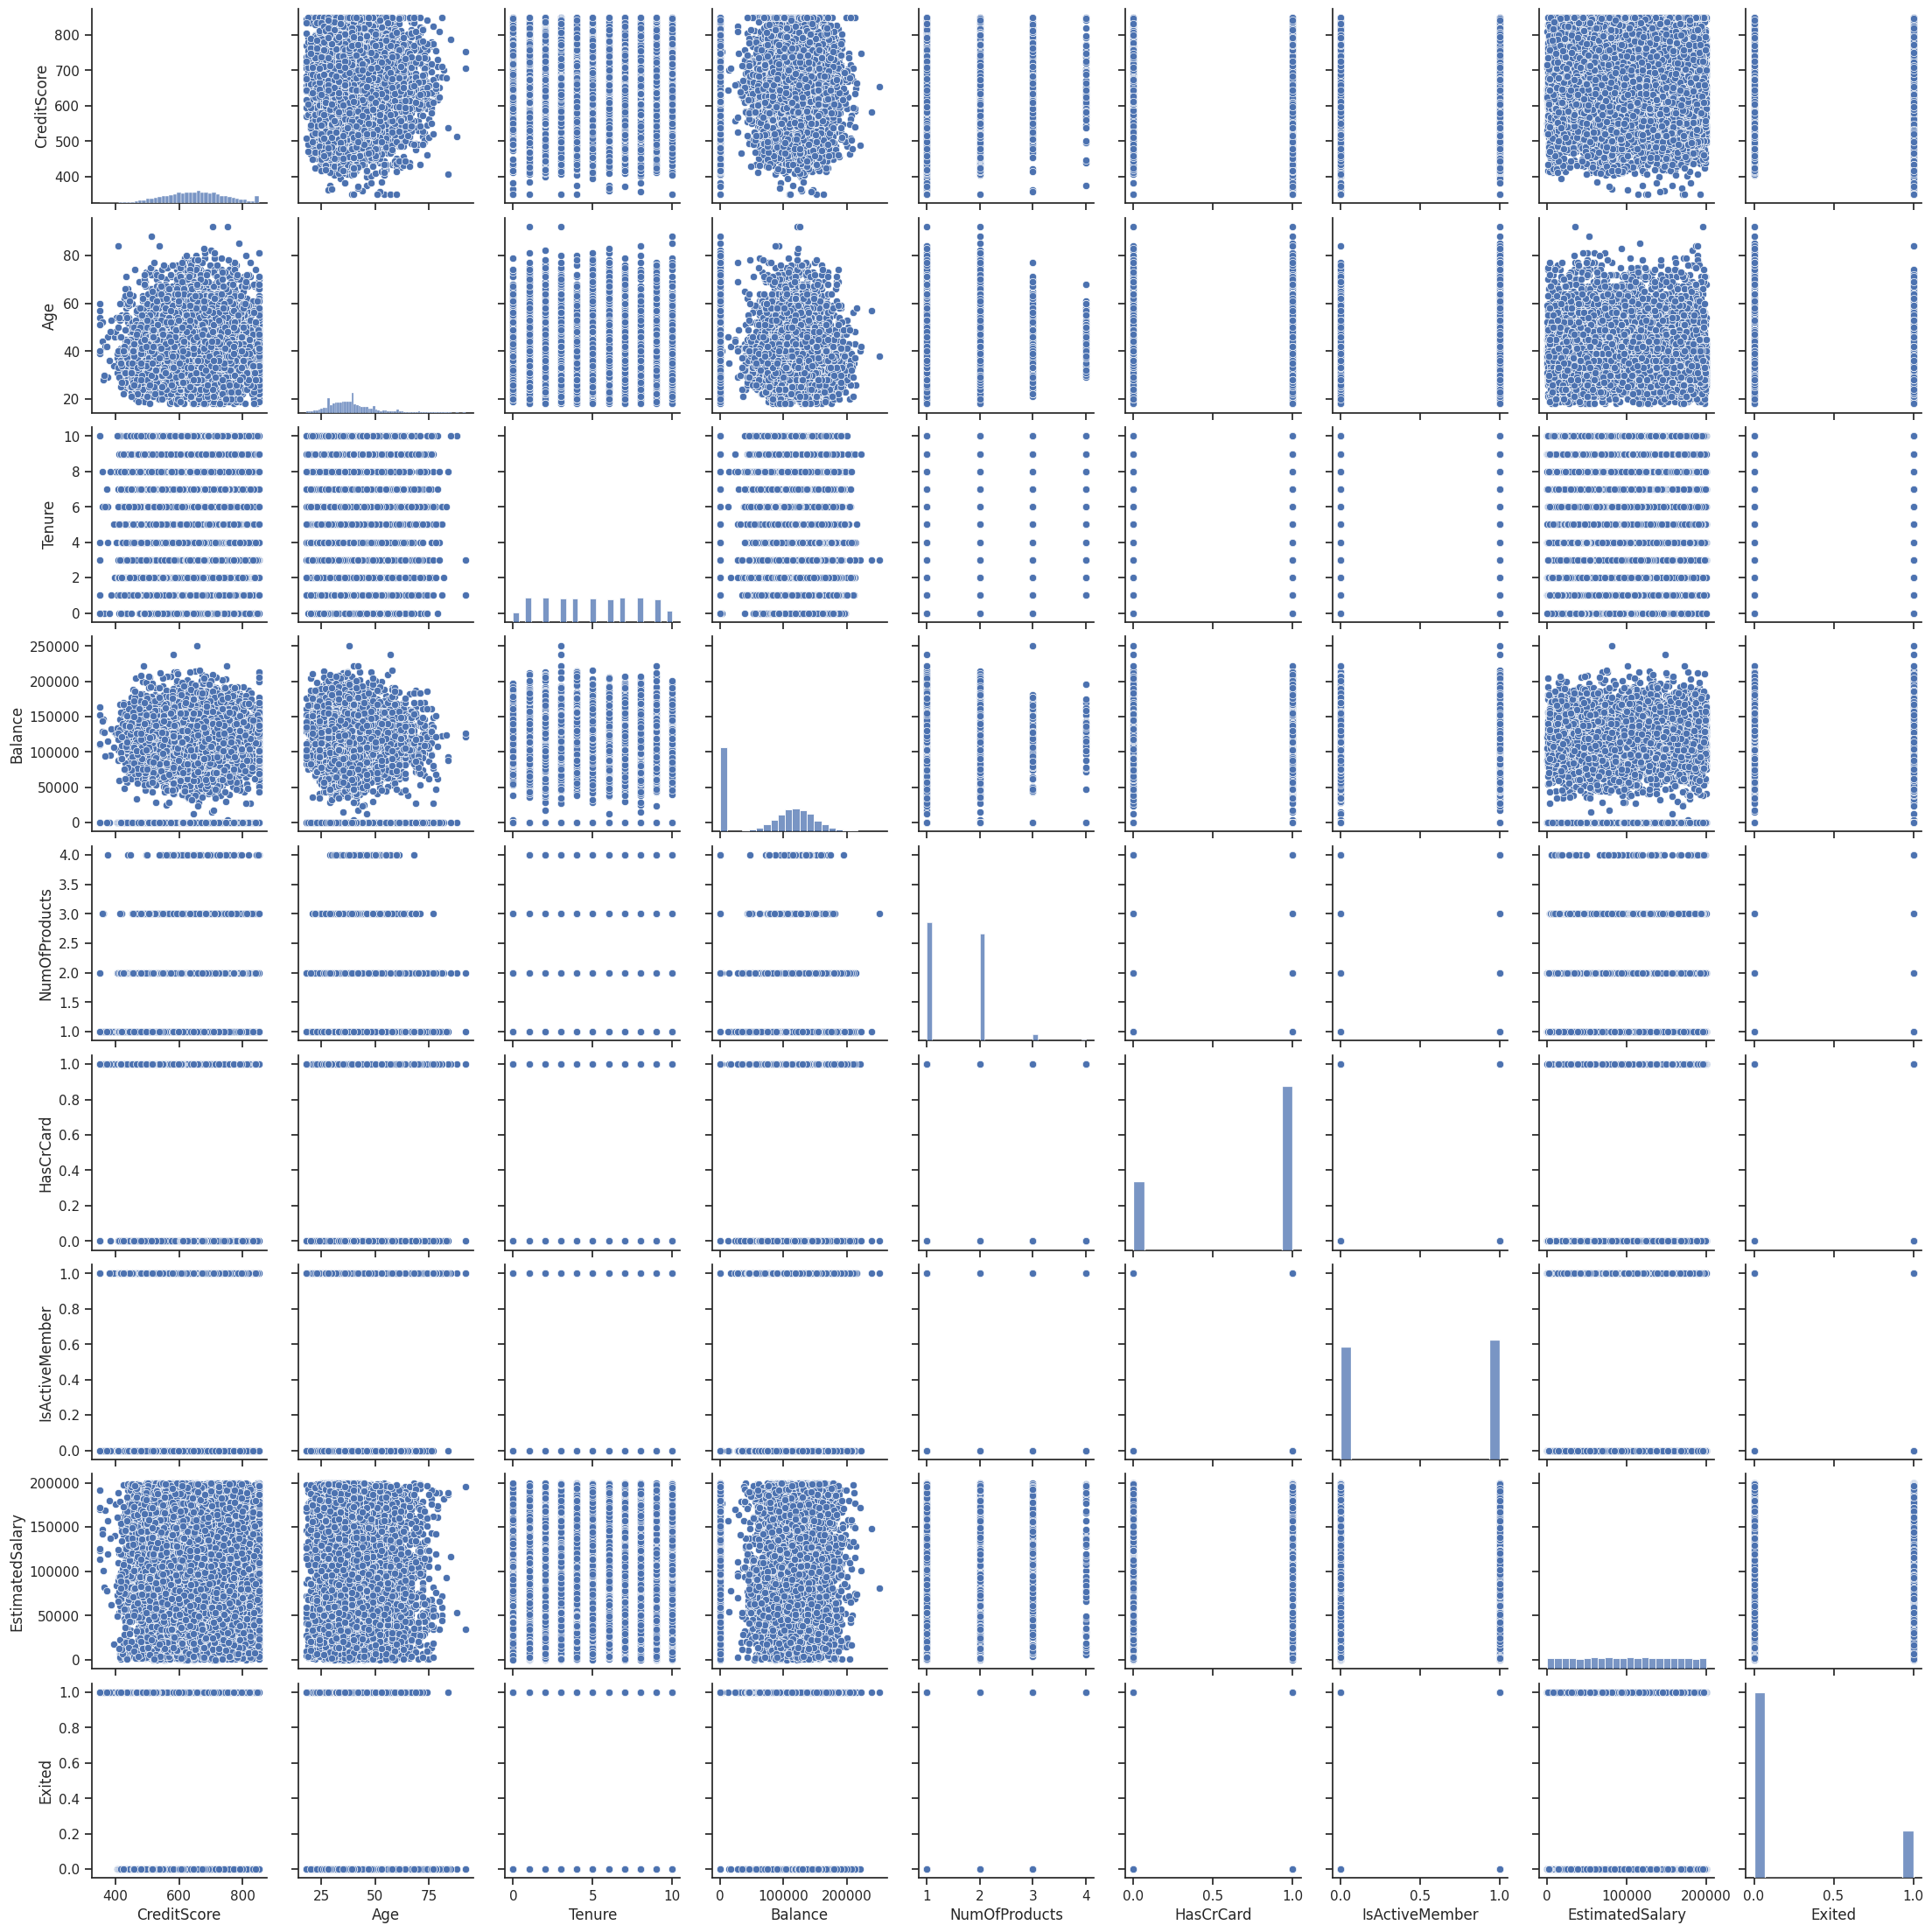

In [11]:
sns.pairplot(dataset)

<Axes: >

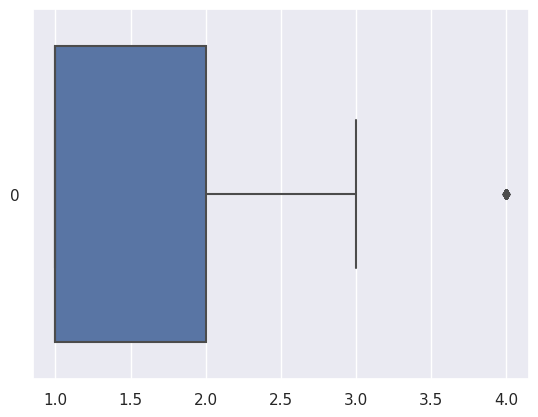

In [12]:
sns.set(style='darkgrid')
sns.boxplot(data=dataset['NumOfProducts'],orient='h')


<Axes: >

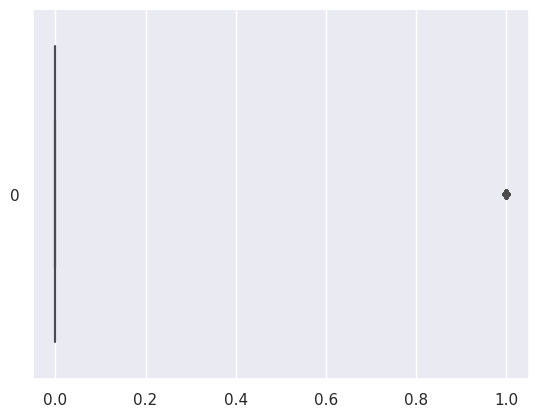

In [13]:
sns.boxplot(data=dataset['Exited'],orient='h')

In [14]:
q1=dataset['CreditScore'].quantile(0.25)
q3=dataset['CreditScore'].quantile(0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
dataset= dataset[dataset['CreditScore']<=borne_sup]
dataset=dataset [dataset['CreditScore']>=borne_inf]

In [15]:
q1=dataset['NumOfProducts'].quantile(0.25)
q3=dataset['NumOfProducts'].quantile(0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
dataset= dataset[dataset['NumOfProducts']<=borne_sup]
dataset=dataset [dataset['NumOfProducts']>=borne_inf]

<Axes: >

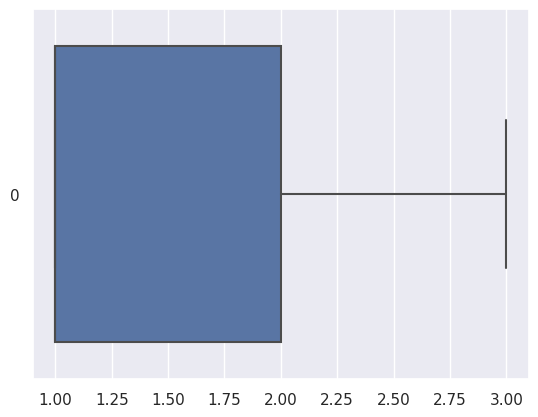

In [16]:
sns.boxplot(data=dataset['NumOfProducts'],orient='h')


(9926, 11)

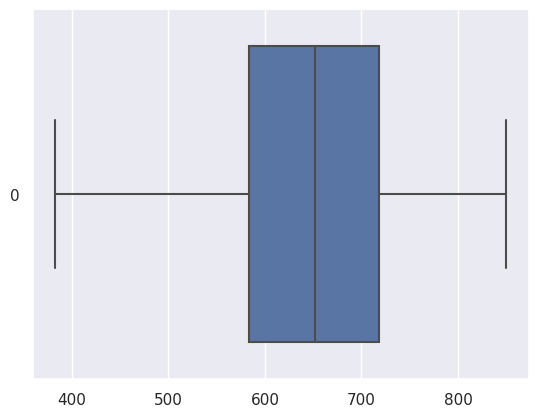

In [17]:
sns.boxplot(data=dataset['CreditScore'],orient='h')
dataset.shape


In [18]:
x2=dataset.iloc[:,0:10]
y2=dataset.iloc[:,10]

In [19]:
x2=pd.get_dummies(data=x2,drop_first=True)

In [20]:
x2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [21]:

from sklearn.model_selection import train_test_split
x_train , x_test,y_train, y_test = train_test_split(x2,y2,test_size=0.2,random_state =0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [22]:
x_train.shape

(7940, 11)

In [23]:
y2.mean()

0.19776344952649608

In [24]:
y_train.mean()

0.19874055415617128

In [25]:
y_test.mean()

0.19385699899295064

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [27]:
lr.coef_

array([[-0.06204321,  0.73855001, -0.08827393,  0.12929961, -0.16498799,
        -0.01742946, -0.53029591,  0.03300247,  0.35808672,  0.03632515,
        -0.25732888]])

In [28]:
lr.intercept_

array([-1.68668828])

In [29]:
lr.coef_[0][10]

-0.25732887989259995

In [30]:
lr.predict_proba(x_test_sc)

array([[0.9716122 , 0.0283878 ],
       [0.81137179, 0.18862821],
       [0.70474554, 0.29525446],
       ...,
       [0.67166757, 0.32833243],
       [0.92802015, 0.07197985],
       [0.87354792, 0.12645208]])

In [31]:
sum=lr.intercept_+np.dot(lr.coef_,x_test_sc[0])
sum


array([-3.53299711])

In [32]:
sigma=1/(1+np.exp(-sum))
sigma

array([0.0283878])

In [33]:
y_test_pred_prob=lr.predict_proba(x_test_sc)[:,1]

In [34]:
y_test_pred_prob

array([0.0283878 , 0.18862821, 0.29525446, ..., 0.32833243, 0.07197985,
       0.12645208])

In [35]:
y_pred_lr=lr.predict(x_test_sc)

In [36]:
y_pred_lr


array([0, 0, 0, ..., 0, 0, 0])

In [37]:
y_pred_lr.shape

(1986,)

In [38]:
from sklearn import metrics

[0.         0.02373517 1.        ] [0.         0.23376623 1.        ] [2 1 0]


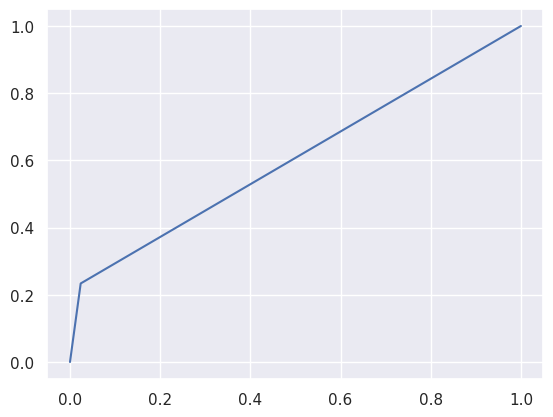

In [39]:
fpr,tpr,thr=metrics.roc_curve(y_test,y_pred_lr)
print(fpr,tpr,thr)
plt.plot(fpr,tpr)

In [40]:
fpr1,tpr1,thr1=metrics.roc_curve(y_test,y_test_pred_prob)

In [41]:
thr1.shape

(479,)

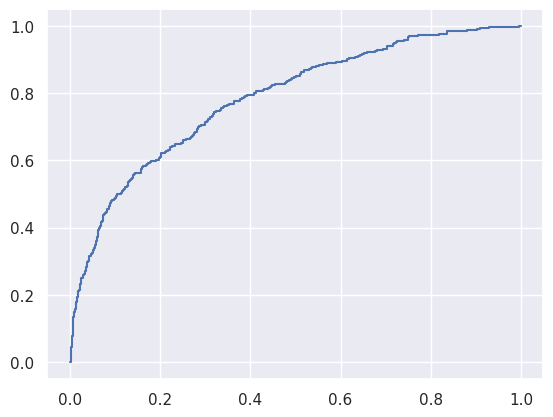

In [42]:
plt.plot(fpr1,tpr1)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [44]:
print(confusion_matrix(y_test,y_pred_lr))

[[1563   38]
 [ 295   90]]


In [45]:
print('Confusion matrix :\n')
print(confusion_matrix(y_test,y_pred_lr))
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_lr)))
print('precision score{0:.3f}'.format(precision_score(y_test,y_pred_lr)))
print('recall score{0:.3f}'.format(recall_score(y_test,y_pred_lr)))

Confusion matrix :

[[1563   38]
 [ 295   90]]
Accuracy score 0.832
precision score0.703
recall score0.234


In [46]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1601
           1       0.70      0.23      0.35       385

    accuracy                           0.83      1986
   macro avg       0.77      0.61      0.63      1986
weighted avg       0.81      0.83      0.80      1986



In [47]:
from numpy import argmax

In [48]:
best=tpr1-fpr1


In [49]:
ix=argmax(best)

In [50]:
ix


197

In [51]:
best_thr=thr1[ix]

In [52]:
best_thr

0.2770966041710766

In [53]:
tpr1[ix]

0.5844155844155844

In [54]:
fpr1[ix]

0.16114928169893816

In [55]:
from sklearn.neighbors import KNeighborsClassifier


In [56]:
from sklearn.model_selection import  GridSearchCV

In [57]:
parameters={'n_neighbors':[1,3,5,7,9,11,13,15,17]}
model=KNeighborsClassifier()
clf=GridSearchCV(model,parameters,scoring='accuracy',cv=5)
grille=clf.fit(x_train_sc,y_train)

In [58]:
print(grille.best_params_)
print(grille.best_score_)


{'n_neighbors': 13}
0.8311083123425693


In [59]:
knn=KNeighborsClassifier(n_neighbors=13)

In [60]:
knn.fit(x_train_sc,y_train)


KNeighborsClassifier(n_neighbors=13)

In [61]:
y_pred_knn=knn.predict(x_test_sc)

In [62]:
print(confusion_matrix(y_test,y_pred_knn))

[[1546   55]
 [ 247  138]]


In [63]:
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_knn)))
print('precision score{0:.3f}'.format(precision_score(y_test,y_pred_knn)))
print('recall score{0:.3f}'.format(recall_score(y_test,y_pred_knn)))

Accuracy score 0.848
precision score0.715
recall score0.358


In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1601
           1       0.72      0.36      0.48       385

    accuracy                           0.85      1986
   macro avg       0.79      0.66      0.69      1986
weighted avg       0.83      0.85      0.83      1986



In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [68]:
y_pred_dt=dt.predict(x_test)

In [69]:
#pip install collatex

In [70]:
#pip install python-levenshtein

In [71]:
#pip install graphviz

In [2]:

from sklearn import tree
from sklearn.tree import export_graphviz


ModuleNotFoundError: No module named 'graphix'

In [ ]:
final_col_names=x2.columns
final_col_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(x2,y2)

DecisionTreeClassifier(max_depth=7)

In [ ]:
tree.export_graphviz(model,feature_names=final_col_names,
                       out_file='tp3.dot',
                        label='all',
                        filled=True,
                        rounded=True)

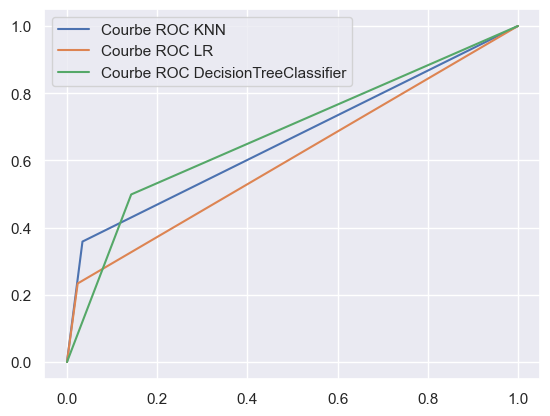

In [ ]:
fpr2, tpr2, thr2,=metrics.roc_curve(y_test, y_pred_knn) #courbe roc de KNN
plt.plot(fpr2,tpr2 , label='Courbe ROC KNN')
fpr, tpr, thr, = metrics.roc_curve(y_test, y_pred_lr)  #courbe roc de LR
plt.plot(fpr,tpr , label='Courbe ROC LR')
fpr3, tpr3, thr3, = metrics.roc_curve(y_test,y_pred_dt)
plt.plot(fpr3,tpr3, label='Courbe ROC DecisionTreeClassifier')
plt.legend()
y_pred_knn_o=grille.predict(x_test_sc)